In [1]:
# -*-coding:utf-8 -*-
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

np.random.seed(sum(map(ord, "categorical")))

titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

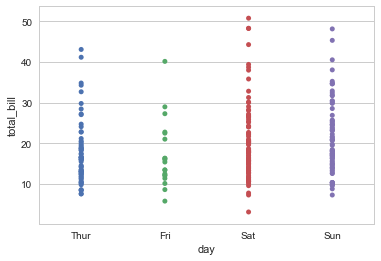

In [2]:
# 使用stripplot()函数是显示分类变量级别中某些定量变量的值的一种简单方法
sns.stripplot(x="day", y="total_bill", data=tips);

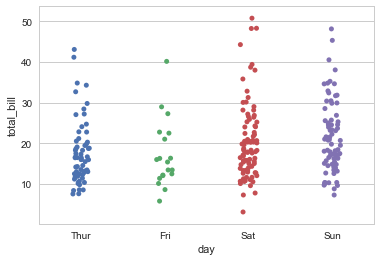

In [3]:
# 使用一些随机的“抖动”调整散点位置
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

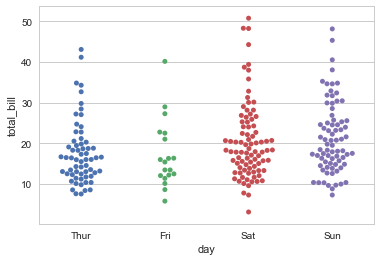

In [4]:
# 使用函数swarmplot()将分类轴上的每个散点图点定位
sns.swarmplot(x="day", y="total_bill", data=tips);

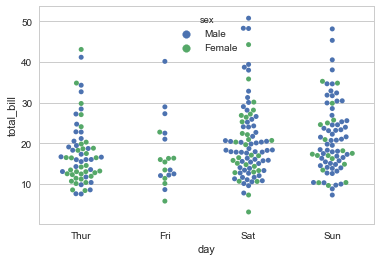

In [5]:
# 传入hue参数添加多个嵌套的分类变量
sns.swarmplot(x="day", y="total_bill", hue="sex",data=tips);

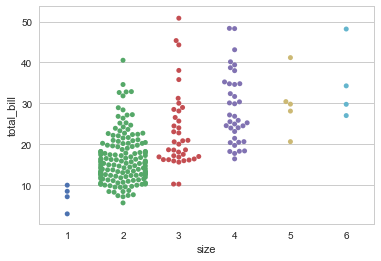

In [6]:
# 一般来说，Seaborn分类绘图功能试图从数据中推断类别的顺序
# 若有pandas分类数据类型，那么类别的默认顺序可以在那里设置
# 字符串类型的类别将按照它们在DataFrame中显示的顺序进行绘制，但是数组类别将被排序
sns.swarmplot(x="size", y="total_bill", data=tips);

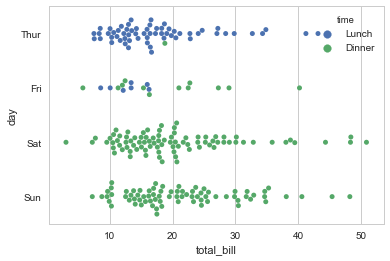

In [7]:
# 通常可以从传递给x和/或y的变量的数据类型推断绘图方向
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

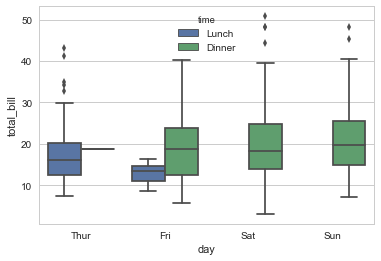

In [8]:
# 使用箱线图观测分类内部的分布
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

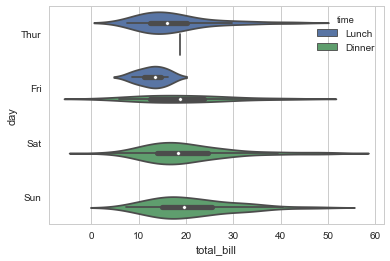

In [9]:
# 小提琴图则结合了箱体图和分布教程中描述的核心密度估计过程
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

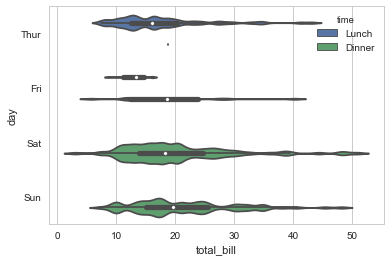

In [10]:
# 由于小提琴使用KDE，还有一些其他可以调整的参数，相对于简单的boxplot增加了一些复杂性
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False);

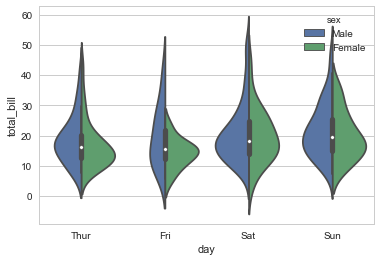

In [11]:
# 当色调参数只有两个级别时，也可以传入参数split至violinplot()，这样可以更有效地利用空间
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

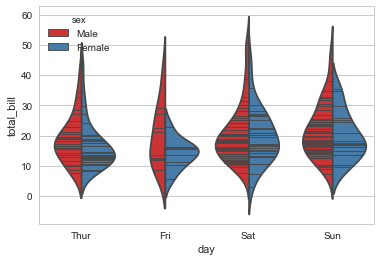

In [12]:
# 在绘制提琴图的时候有几个选项，包括显示每个人的观察结果而不是总结框图值的方法
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set1");

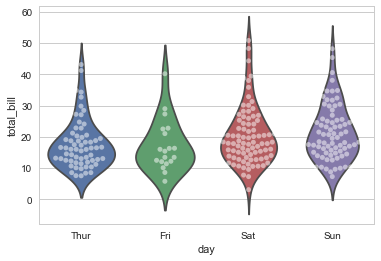

In [13]:
# 将swarmplot()或者swarmplot()与violinplot()或boxplot()结合使用可以显示每个观察结果以及分布的摘要
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);

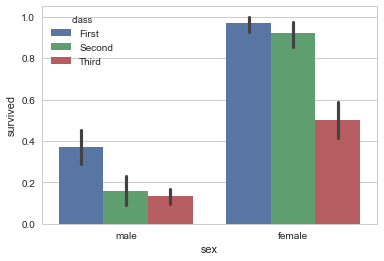

In [14]:
# 使用条形图显示值的集中趋势
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

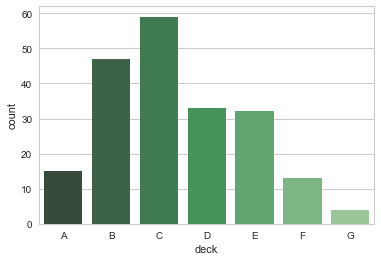

In [15]:
# 使用countplot()函数绘制每个类别中的观察次数
sns.countplot(x="deck", data=titanic, palette="Greens_d");

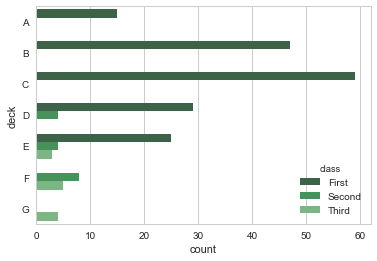

In [16]:
# 可以使用上面讨论的所有选项来调用barplot()和countplot()，以及在每个函数的详细文档中的其他选项
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

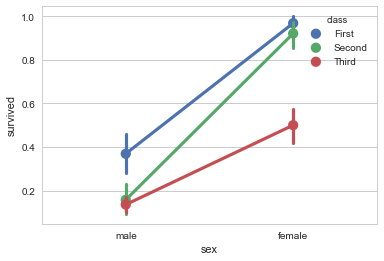

In [17]:
# pointplot()函数只绘制点估计和置信区间
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

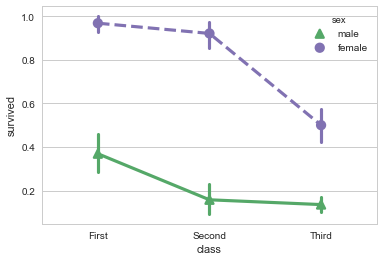

In [18]:
# 使用不同的标记和线条样式来展示不同hue类别的层次
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

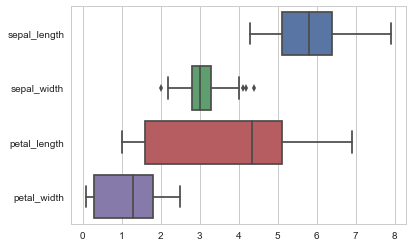

In [19]:
# 绘制“宽格式”数据
# 添加orient参数控制绘图方向
sns.boxplot(data=iris,orient="h");

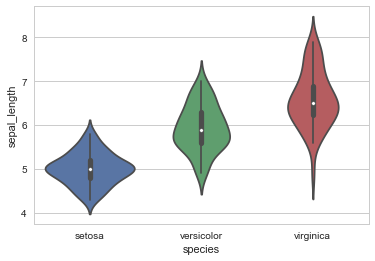

In [20]:
# 这些函数接受Pandas或numpy对象的向量，而不是DataFrame中的变量
sns.violinplot(x=iris.species, y=iris.sepal_length);

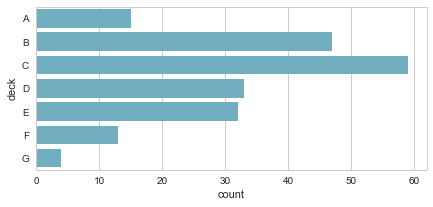

In [21]:
# 为了控制由上述功能制作的图形的大小和形状，必须使用matplotlib命令自己设置图形
# 这也意味着这些图块可以和其他种类的图块一起在一个多面板的绘制中共存
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

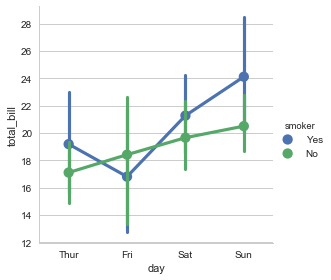

In [22]:
# 更高级别的函数factorplot()，将这些函数与FacetGrid()相结合，通过这个图形的更大的结构来增加展示其他类别的能力
# 默认情况下，factorplot()产生一个pairplot()
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

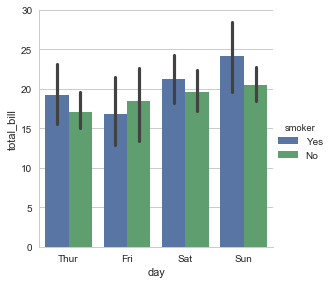

In [23]:
# 添加kind参数可以选择以上讨论的任何种类的图
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

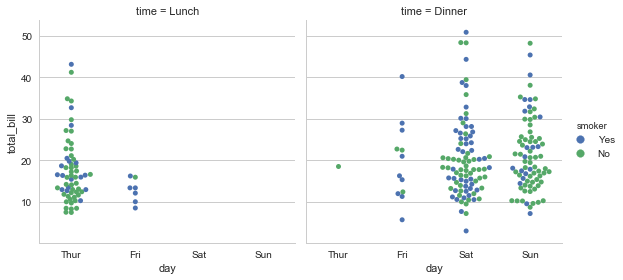

In [24]:
# 使用factorplot()的主要优点是很容易调用"facet"展开更多其他分类变量
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

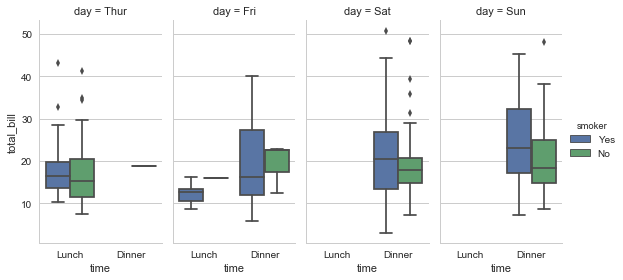

In [25]:
# 基于FacetGrid的工作原理，要更改图形的大小和形状，需要指定适用于每个方面的size和aspect参数
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

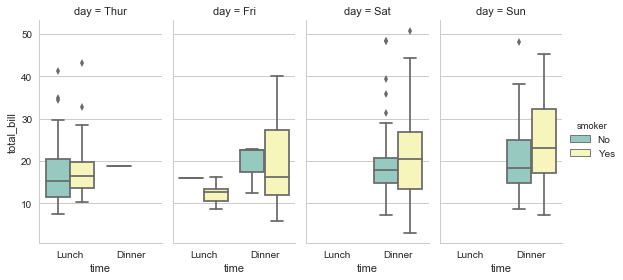

In [26]:
# 也可以直接使用boxplot()和FacetGrid来制作这个图
# 方法是使用具有Categorical数据类型的数据或通过命令和hue_order
sns.factorplot(x="time", y="total_bill", hue="smoker",hue_order=["No","Yes"]
               ,col="day", data=tips, kind="box", size=4, aspect=.5,
              palette="Set3");

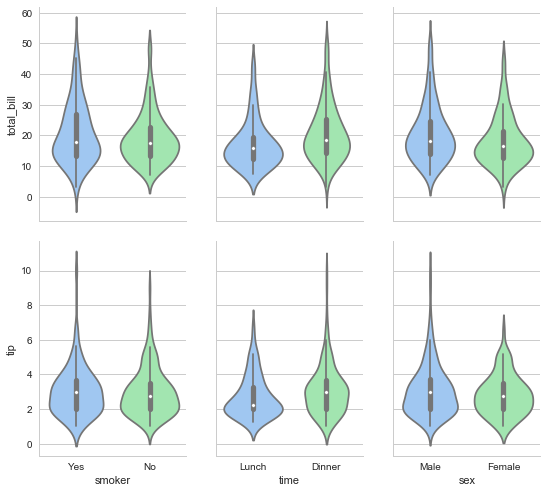

In [27]:
# 由于分类图的广义API，它们应该很容易应用于其他更复杂的上下文。
# 例如，它们可以轻松地与PairGrid结合，以显示多个不同变量之间的分类关系
g = sns.PairGrid(tips,x_vars=["smoker", "time", "sex"],y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");